## Numerical Feature Scaling

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# importing the preprocessed dataset
data=pd.read_csv('https://raw.githubusercontent.com/thamidu02/AIML_project/refs/heads/main/data/IT24610808.csv')

In [7]:
# converting imported data into pandas dataframe
data_df=pd.DataFrame(data)

In [8]:
data_df.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,daily_supplement_dosage,target,work_sleep_balance
0,56,Male,173.416872,56.886640,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,...,High,Poor,No,High,5,No,Yes,-2.275502,healthy,1.184597
1,69,Female,163.207380,97.799859,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,...,Moderate,Moderate,No,High,5,Yes,No,6.239340,healthy,1.128943
2,46,Male,177.281966,80.687562,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,...,High,Good,Yes,High,4,No,No,5.423737,healthy,1.022393
3,32,Female,172.101255,63.142868,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,...,Low,Moderate,No,High,1,No,Yes,8.388611,healthy,1.829050
4,60,Female,163.608816,40.000000,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,...,Low,Moderate,Yes,High,1,Yes,Yes,0.332622,healthy,0.919486


as we mentioned above we didnt remove the outliers from our data due to if we remove each individual outliers from the columns algorithms might unable to capture the rare instances of data in the higher dimensional space so rather than removing the individual outliers what we are going to do is we are going to use the RobustScaler for which is a numeric feature scaling method which resistent to outliers.

Advantages of using RobustScaler

1. Resistent to outliers

    * Outliers don’t affect the scaling as much because the median and IQR (Q3 – Q1) are robust statistics.
    * Example: If one salary is 10 million while most are around 10k–50k, RobustScaler won’t let that single value dominate the scale.

2. Keeps Distribution Shape

    * Unlike MinMaxScaler, which squeezes data into [0,1] and exaggerates outliers, RobustScaler keeps the relative spacing of most data points intact.

3. Works Well for Skewed Data

    * Since it’s not tied to the mean, it can handle skewed distributions better than StandardScaler.

In [9]:
# import the robustscaler
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()


In [10]:
# selecting the numerical features
numerical_features=data_df.select_dtypes(include=[np.number]).columns.tolist()

In [11]:
# fitting the data to the robustScaler
r_scaler.fit(data_df[numerical_features])

RobustScaler()

In [12]:
# transform data the learned interpretaions from the scaling
data_df[numerical_features]=r_scaler.transform(data_df[numerical_features])

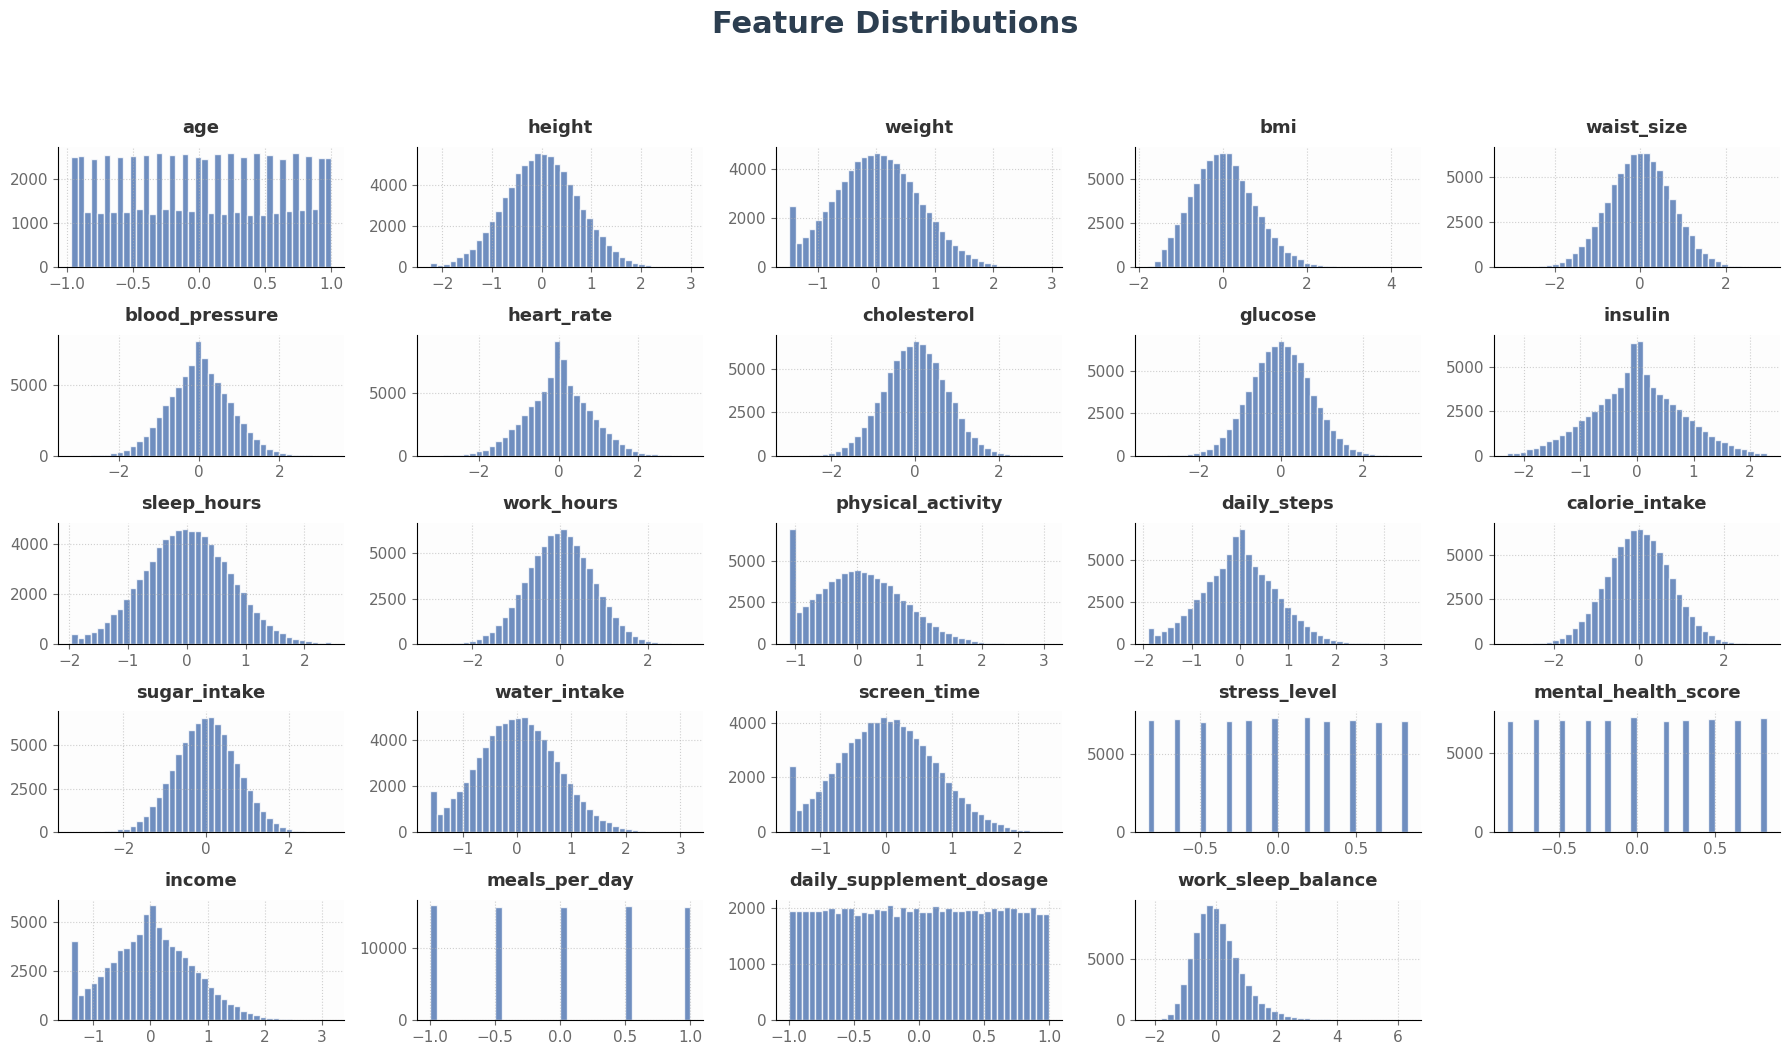

In [14]:
# numerical feature distribution after scaling with RobustScaler
ax = data_df.hist(
    bins=40,
    figsize=(18, 10),
    color='#4C72B0',
    edgecolor='white',
    alpha=0.8,
    grid=False
)

for a in ax.ravel():
    a.set_facecolor("#fdfdfd")
    a.grid(True, linestyle=':', alpha=0.6)
    a.tick_params(axis='x', labelsize=11, colors="dimgray")
    a.tick_params(axis='y', labelsize=11, colors="dimgray")
    a.set_title(
        a.get_title(),
        fontsize=13,
        fontweight='semibold',
        color="#333333",
        pad=10
    )

    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

plt.suptitle(
    "Feature Distributions",
    fontsize=22,
    fontweight='bold',
    color="#2C3E50",
    y=1.05
)
plt.tight_layout()
plt.show()


 we can see that after scaling we still manages to protect the data distribution of each numeric feaature

In [15]:
data_df.to_csv('IT24101992.csv',index=False)